<a href="https://www.kaggle.com/code/collinslemeke/heart-attack-risk-predictor?scriptVersionId=246938554" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Import All Necessary Libraries

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping

2025-06-23 09:59:45.123983: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-06-23 09:59:45.124203: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-06-23 09:59:45.283235: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


In [2]:
heart = pd.read_csv('/kaggle/input/heart-attack-dataset/heart_attack_dataset.csv')
heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [3]:
heart.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

In [4]:
heart.describe()

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,Medication Use,Stress Level,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Heart Attack Risk
count,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000,8763.000000
mean,53.707977,259.877211,75.021682,0.652288,0.492982,0.896839,0.501426,0.598083,10.014284,0.495835,0.498345,5.469702,5.993690,158263.181901,28.891446,417.677051,3.489672,7.023508,0.358211
std,21.249509,80.863276,20.550948,0.476271,0.499979,0.304186,0.500026,0.490313,5.783745,0.500011,0.500026,2.859622,3.466359,80575.190806,6.319181,223.748137,2.282687,1.988473,0.479502
min,18.000000,120.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.002442,0.000000,0.000000,1.000000,0.001263,20062.000000,18.002337,30.000000,0.000000,4.000000,0.000000
25%,35.000000,192.000000,57.000000,0.000000,0.000000,1.000000,0.000000,0.000000,4.981579,0.000000,0.000000,3.000000,2.998794,88310.000000,23.422985,225.500000,2.000000,5.000000,0.000000
50%,54.000000,259.000000,75.000000,1.000000,0.000000,1.000000,1.000000,1.000000,10.069559,0.000000,0.000000,5.000000,5.933622,157866.000000,28.768999,417.000000,3.000000,7.000000,0.000000
75%,72.000000,330.000000,93.000000,1.000000,1.000000,1.000000,1.000000,1.000000,15.050018,1.000000,1.000000,8.000000,9.019124,227749.000000,34.324594,612.000000,5.000000,9.000000,1.000000
max,90.000000,400.000000,110.000000,1.000000,1.000000,1.000000,1.000000,1.000000,19.998709,1.000000,1.000000,10.000000,11.999313,299954.000000,39.997211,800.000000,7.000000,10.000000,1.000000


In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8763 entries, 0 to 8762
Data columns (total 26 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Patient ID                       8763 non-null   object 
 1   Age                              8763 non-null   int64  
 2   Sex                              8763 non-null   object 
 3   Cholesterol                      8763 non-null   int64  
 4   Blood Pressure                   8763 non-null   object 
 5   Heart Rate                       8763 non-null   int64  
 6   Diabetes                         8763 non-null   int64  
 7   Family History                   8763 non-null   int64  
 8   Smoking                          8763 non-null   int64  
 9   Obesity                          8763 non-null   int64  
 10  Alcohol Consumption              8763 non-null   int64  
 11  Exercise Hours Per Week          8763 non-null   float64
 12  Diet                

In [6]:
print(heart['Heart Attack Risk'].unique())
print()
print("below are the counts for the unique values")

print()
print(heart['Heart Attack Risk'].value_counts())

[0 1]

below are the counts for the unique values

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


In [7]:
# check for missing values
print(heart.isnull().sum())
print()
print('-------below is the duplicate check-------')
print()
# check for duplicates
print(heart[heart.duplicated()])

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

-------below is the dupl

In [8]:
heart.shape

(8763, 26)

In [9]:
heart.head()

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0


In [10]:

heart = heart.drop(columns = ['Patient ID', 'Country', 'Continent'])
heart.columns.tolist()

['Age',
 'Sex',
 'Cholesterol',
 'Blood Pressure',
 'Heart Rate',
 'Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Diet',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Hemisphere',
 'Heart Attack Risk']

In [11]:
heart['Blood Pressure Category'] = pd.cut(heart['Blood Pressure'].apply(lambda x: int(x.split('/')[0])),
                                          bins=[0, 120, 140, 160, float('inf')],
                                          labels=['Normal', 'Elevated', 'Hypertension Stage 1', 'Hypertension Stage 2'])

heart_binned = heart.drop(columns=['Blood Pressure'])

cat_scaler = OneHotEncoder(sparse=False)

categorical_col = ['Sex', 'Blood Pressure Category', 'Diet', 'Hemisphere']

encoded_cat = cat_scaler.fit_transform(heart_binned[categorical_col])

encoded_df = pd.DataFrame(encoded_cat, columns=cat_scaler.get_feature_names_out(categorical_col))

heart_binned = pd.concat([heart_binned.drop(columns=categorical_col), encoded_df], axis=1)

heart_binned.columns.tolist()

/opt/conda/lib/python3.10/site-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


['Age',
 'Cholesterol',
 'Heart Rate',
 'Diabetes',
 'Family History',
 'Smoking',
 'Obesity',
 'Alcohol Consumption',
 'Exercise Hours Per Week',
 'Previous Heart Problems',
 'Medication Use',
 'Stress Level',
 'Sedentary Hours Per Day',
 'Income',
 'BMI',
 'Triglycerides',
 'Physical Activity Days Per Week',
 'Sleep Hours Per Day',
 'Heart Attack Risk',
 'Sex_Female',
 'Sex_Male',
 'Blood Pressure Category_Elevated',
 'Blood Pressure Category_Hypertension Stage 1',
 'Blood Pressure Category_Hypertension Stage 2',
 'Blood Pressure Category_Normal',
 'Diet_Average',
 'Diet_Healthy',
 'Diet_Unhealthy',
 'Hemisphere_Northern Hemisphere',
 'Hemisphere_Southern Hemisphere']

In [12]:
columns_to_display = [
    
    'Stress Level',
    'Sedentary Hours Per Day',
    'Income',
    'BMI',
    'Triglycerides',
    'Physical Activity Days Per Week',
    'Sleep Hours Per Day'
]

print(heart_binned[columns_to_display].head())

   Stress Level  Sedentary Hours Per Day  Income        BMI  Triglycerides  \
0             9                 6.615001  261404  31.251233            286   
1             1                 4.963459  285768  27.194973            235   
2             9                 9.463426  235282  28.176571            587   
3             9                 7.648981  125640  36.464704            378   
4             6                 1.514821  160555  21.809144            231   

   Physical Activity Days Per Week  Sleep Hours Per Day  
0                                0                    6  
1                                1                    7  
2                                4                    4  
3                                3                    4  
4                                1                    5  


In [13]:
numeric_columns = [
    'Age', 'Cholesterol', 'Heart Rate', 
    'Exercise Hours Per Week', 'Stress Level', 'Sedentary Hours Per Day',
    'Income', 'BMI', 'Triglycerides', 'Physical Activity Days Per Week',
    'Sleep Hours Per Day'
]

scaler = MinMaxScaler()

heart_binned[numeric_columns] = scaler.fit_transform(heart_binned[numeric_columns])

print(heart_binned.head())

        Age  Cholesterol  Heart Rate  Diabetes  Family History  Smoking  \
0  0.680556     0.314286    0.457143         0               0        1   
1  0.041667     0.960714    0.828571         1               1        1   
2  0.041667     0.728571    0.457143         1               0        0   
3  0.916667     0.939286    0.471429         1               1        1   
4  0.666667     0.707143    0.757143         1               1        1   

   Obesity  Alcohol Consumption  Exercise Hours Per Week  \
0        0                    0                 0.208326   
1        1                    1                 0.090557   
2        0                    0                 0.103815   
3        0                    1                 0.491376   
4        1                    0                 0.290147   

   Previous Heart Problems  ...  Sex_Male  Blood Pressure Category_Elevated  \
0                        0  ...       1.0                               0.0   
1                        1  ..

In [14]:

heart_binned

,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,Previous Heart Problems,...,Sex_Male,Blood Pressure Category_Elevated,Blood Pressure Category_Hypertension Stage 1,Blood Pressure Category_Hypertension Stage 2,Blood Pressure Category_Normal,Diet_Average,Diet_Healthy,Diet_Unhealthy,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere
0,0.680556,0.314286,0.457143,0,0,1,0,0,0.208326,0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.041667,0.960714,0.828571,1,1,1,1,1,0.090557,1,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0
2,0.041667,0.728571,0.457143,1,0,0,0,0,0.103815,1,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0
3,0.916667,0.939286,0.471429,1,1,1,0,1,0.491376,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.666667,0.707143,0.757143,1,1,1,1,0,0.290147,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,0.583333,0.003571,0.300000,1,1,1,0,1,0.395819,1,...,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
8759,0.138889,0.000000,0.471429,1,0,0,1,0,0.827954,0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8760,0.402778,0.464286,0.928571,0,1,1,1,1,0.157329,1,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
8761,0.250000,0.207143,0.285714,1,0,1,0,0,0.189411,1,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0


In [15]:

X = heart_binned.drop("Heart Attack Risk", axis = 1)
y = heart_binned['Heart Attack Risk']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 32)

In [16]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

model = Sequential()

model.add(Input(shape=(29,)))

model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(256, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.4))

model.add(Dense(128, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))

model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

early_stopping = EarlyStopping(monitor='val_loss', patience=4, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_loss')

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    batch_size=15,
    callbacks=[early_stopping, model_checkpoint]
)

Epoch 1/30
468/468 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.5534 - loss: 0.7950 - val_accuracy: 0.6030 - val_loss: 0.6749
Epoch 2/30
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5831 - loss: 0.6983 - val_accuracy: 0.6332 - val_loss: 0.6571
Epoch 3/30
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6153 - loss: 0.6805 - val_accuracy: 0.6406 - val_loss: 0.6547
Epoch 4/30
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6321 - loss: 0.6627 - val_accuracy: 0.6440 - val_loss: 0.6592
Epoch 5/30
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6219 - loss: 0.6660 - val_accuracy: 0.6458 - val_loss: 0.6563
Epoch 6/30
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6357 - loss: 0.6581 - val_accuracy: 0.6452 - val_loss: 0.6563
Epoch 7/30
468/468 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.6385 - loss: 0.6576 - val_accuracy: 0.6469 - val_loss: 0.6569


In [17]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)

print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6393 - loss: 0.6560
Test Loss: 0.6546539664268494
Test Accuracy: 0.6406160593032837


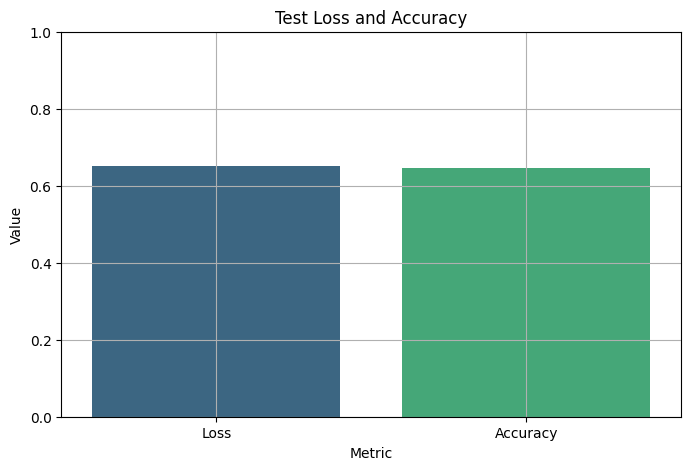

In [18]:

test_loss = 0.6523934006690979  
test_accuracy = 0.6457501649856567 

import pandas as pd

data = {
    'Metric': ['Loss', 'Accuracy'],
    'Value': [test_loss, test_accuracy]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))

sns.barplot(x='Metric', y='Value', data=df, palette='viridis')

plt.title('Test Loss and Accuracy')
plt.xlabel('Metric')
plt.ylabel('Value')
plt.ylim(0, 1)
plt.grid(True)

plt.show()


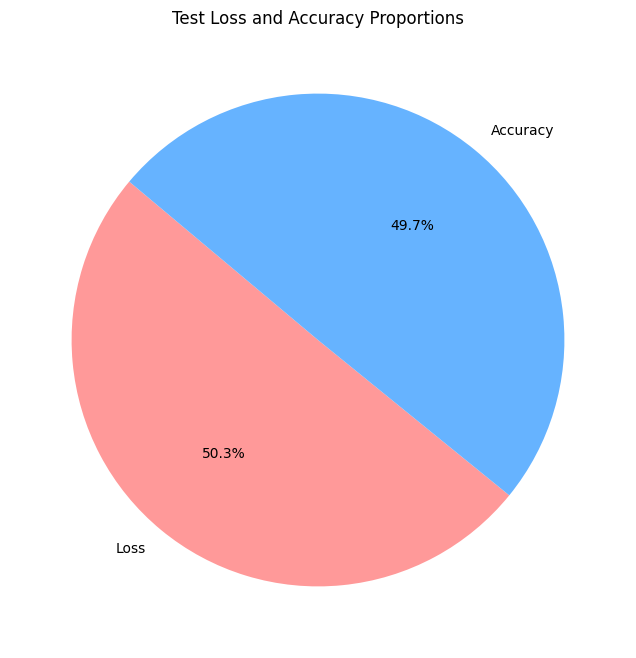

In [19]:
labels = ['Loss', 'Accuracy']
sizes = [test_loss, test_accuracy]

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#ff9999','#66b3ff'], startangle=140)
plt.title('Test Loss and Accuracy Proportions')
plt.show()

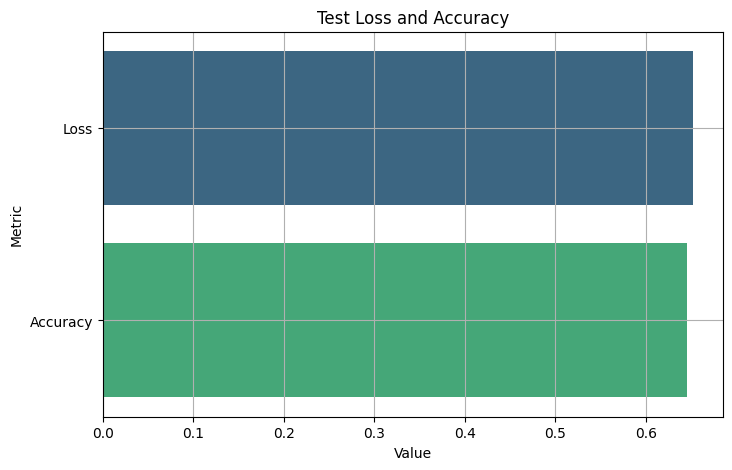

In [20]:
data = {
    'Metric': ['Loss', 'Accuracy'],
    'Value': [test_loss, test_accuracy]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.barplot(x='Value', y='Metric', data=df, palette='viridis')

plt.title('Test Loss and Accuracy')
plt.xlabel('Value')
plt.grid(True)

plt.show()

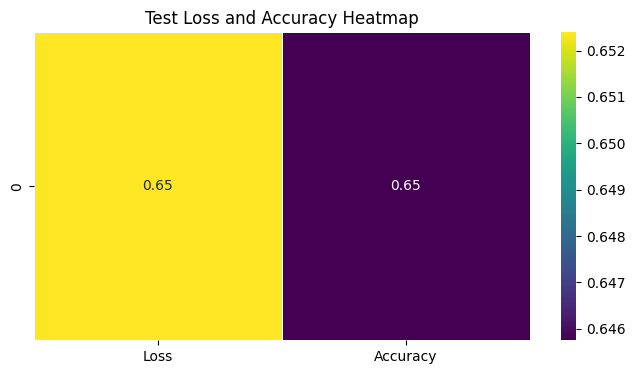

In [21]:
data = np.array([[test_loss, test_accuracy]])
metrics = ['Loss', 'Accuracy']
df = pd.DataFrame(data, columns=metrics)

plt.figure(figsize=(8, 4))
sns.heatmap(df, annot=True, cmap='viridis', cbar=True, fmt='.2f', linewidths=.5)

plt.title('Test Loss and Accuracy Heatmap')
plt.show()

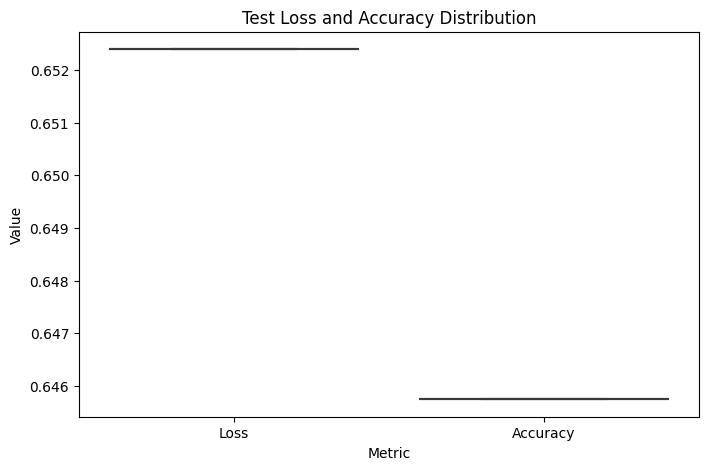

In [22]:
data = {
    'Metric': ['Loss', 'Accuracy'],
    'Value': [test_loss, test_accuracy]
}

df = pd.DataFrame(data)

plt.figure(figsize=(8, 5))
sns.boxplot(x='Metric', y='Value', data=df, palette='viridis')

plt.title('Test Loss and Accuracy Distribution')
plt.show()

In [23]:
predictions = model.predict(X_test)

predicted_classes = (predictions > 0.5).astype("int32")

print(predicted_classes)

55/55 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
[[0]
 [0]
 [0]
 ...
 [0]
 [0]
 [0]]
